In [2]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('data/fraudData.csv', encoding='latin-1')

In [4]:
y = df['is_fraud']
x = df.drop(['is_fraud'], axis=1).copy()

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.shape

(1296675, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


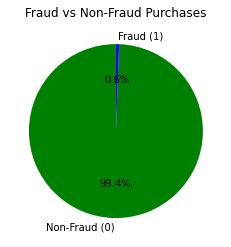

In [10]:
fraud_counts = df['is_fraud'].value_counts()

labels = ['Non-Fraud (0)', 'Fraud (1)']
colors = ['green', 'blue']

plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Fraud vs Non-Fraud Purchases')
plt.show()


<AxesSubplot:xlabel='amt', ylabel='Probability'>

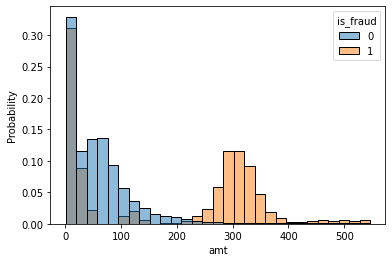

In [11]:
import seaborn as sns

percent99 = df['amt'].quantile(0.99)

filtered_data = df[df["amt"] <= percent99]

sns.histplot(x='amt', hue='is_fraud', bins=29,
             stat='probability', data=filtered_data,
             common_norm=False)


<AxesSubplot:xlabel='amt', ylabel='is_fraud'>

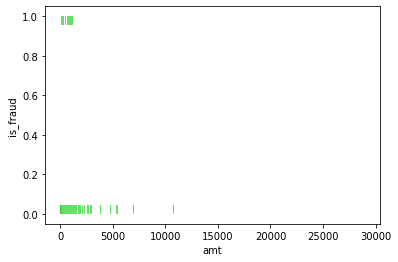

In [12]:
sns.histplot(data = df , x ='amt',y = 'is_fraud', color='green')

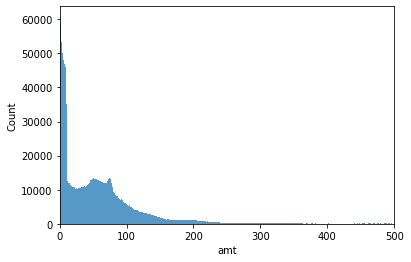

In [13]:
sns.histplot(x = 'amt', data = df)
plt.xlim(0, 500)
plt.show()

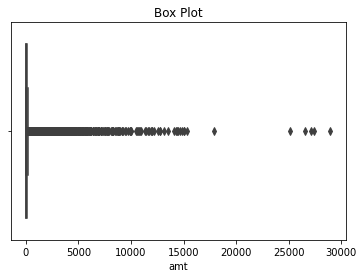

In [14]:
sns.boxplot(x='amt', data=df)

plt.xlabel("amt")
plt.title("Box Plot")
plt.show()

In [15]:
creditNumFreq = df.groupby("cc_num").size()
creditNumFreq = creditNumFreq.sort_values(ascending=True).reset_index(name="cc_num_frequency")
df = df.merge(creditNumFreq, on="cc_num", how="left")

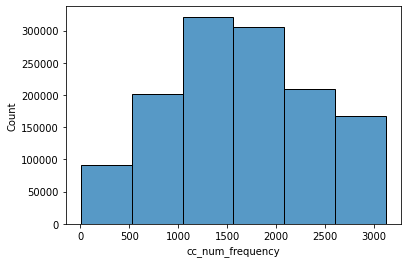

In [16]:
sns.histplot(df["cc_num_frequency"], bins=6);

In [17]:
import datetime as dt
df['age'] = dt.date.today().year-pd.to_datetime(df['dob']).dt.year

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'merchant', 'category', 'job', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'city', 'street', 'state', 'dob', 'trans_num']

for col in categorical_columns:
    x[col] = label_encoder.fit_transform(x[col])
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
df.drop(columns=["Unnamed: 0", "gender", "state", "zip", "long", "lat",
                 "city_pop", "merch_long", "dob", "street", "trans_num"], inplace=True)

In [20]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,city,job,unix_time,merch_lat,is_fraud,cc_num_frequency,age
0,0,2703186189652095,514,8,4.97,162,18,526,370,1325376018,36.011293,0,2028,35
1,1,630423337322,241,4,107.23,309,157,612,428,1325376044,49.159047,0,3030,45
2,2,38859492057661,390,0,220.11,115,381,468,307,1325376051,43.150704,0,503,61
3,3,3534093764340240,360,2,45.00,163,463,84,328,1325376076,47.034331,0,493,56
4,4,375534208663984,297,9,41.96,336,149,216,116,1325376186,38.674999,0,2017,37


<AxesSubplot:>

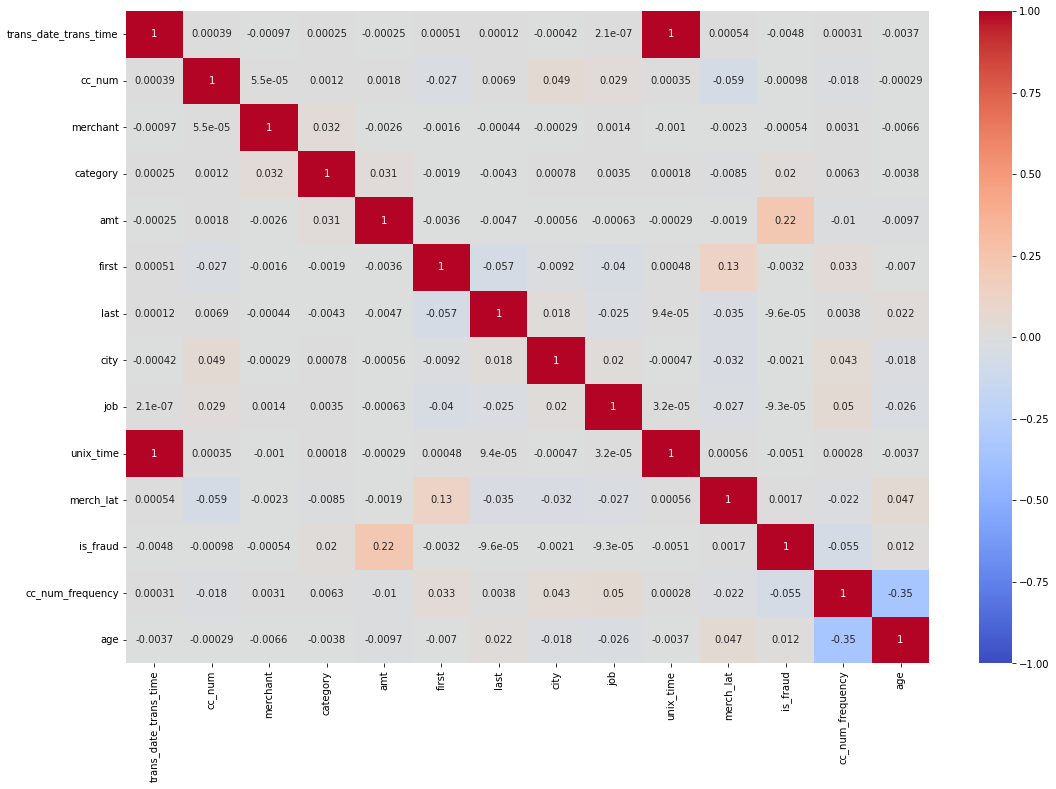

In [21]:
import seaborn as sns
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1)

In [22]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

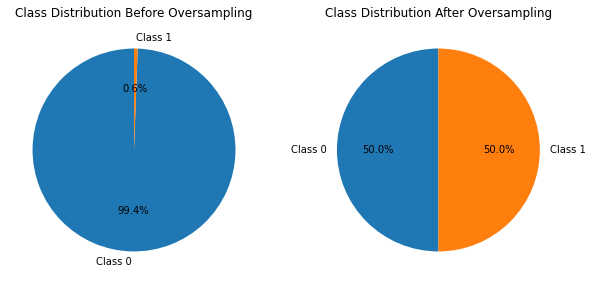

In [24]:
ros = RandomOverSampler(random_state=42)

x_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(np.bincount(ytrain), labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before Oversampling')

plt.subplot(1, 2, 2)
plt.pie(np.bincount(y_resampled), labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After Oversampling')

plt.show()

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf=LogisticRegression()
clf.fit(x_resampled,y_resampled)

print(clf.score(xtest,ytest))
y_pred = clf.predict(xtest)


0.9481905643279928


In [26]:
from sklearn.model_selection import cross_val_score

scores_log=cross_val_score(clf,x_resampled,y_resampled,cv=5)

print(scores_log)

[0.85527981 0.85487499 0.85536465 0.85446048 0.85504468]


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9932383810863926
Recall: 0.9481905643279928
F1 Score: 0.9684953841123696


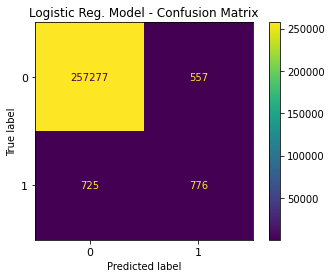

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(ytest, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Reg. Model - Confusion Matrix")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_resampled, y_resampled)

y_pred=knn.predict(xtest)

print("K: ",1,"Train Score: ",knn.score(x_resampled,y_resampled), "Test Score: ",knn.score(xtest,ytest))

K:  1 Train Score:  1.0 Test Score:  0.995056587039929


In [31]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(xtrain, ytrain)

y_pred = knn.predict(xtest)

print("K: Train Score: ", knn.score(xtrain,ytrain), "Test Score: ", knn.score(xtest,ytest))

K: Train Score:  0.9954450806871421 Test Score:  0.9949216264676962


In [32]:
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9937676164045843
Recall: 0.9949216264676962
F1 Score: 0.993502184547694


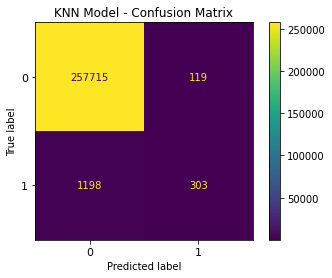

In [33]:
cm = confusion_matrix(ytest, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("KNN Model - Confusion Matrix")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()